# Phase 1, stage 2 - visualising the prediction results and running LIME

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

plt.rcParams['figure.figsize'] = [10, 10]

In [10]:
all_df = pd.read_csv("./output/all9classes_predictions_03May2022.csv")
all_df = all_df.loc[all_df.qc_class.isin(["airliner", "warplane"]), ]

with open("./output/all9class_index.json", "r") as f:
    class_index = json.load(f)

all_df.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'long_model', 'airline',
       'photo_date', 'uploaded_date', 'location', 'uploader', 'photo_link',
       'download_path', 'model', 'variant', 'qc_class', 'pred_A320',
       'pred_A330', 'pred_A340', 'pred_A350', 'pred_A380', 'pred_B737',
       'pred_B747', 'pred_B777', 'pred_B787', 'prediction_class'],
      dtype='object')

In [3]:
all_df["prediction_class"]

0        A320
1        A330
2        A320
3        A320
4        A320
         ... 
18533    B787
18534    B787
18535    A380
18536    B737
18537    B787
Name: prediction_class, Length: 18538, dtype: object

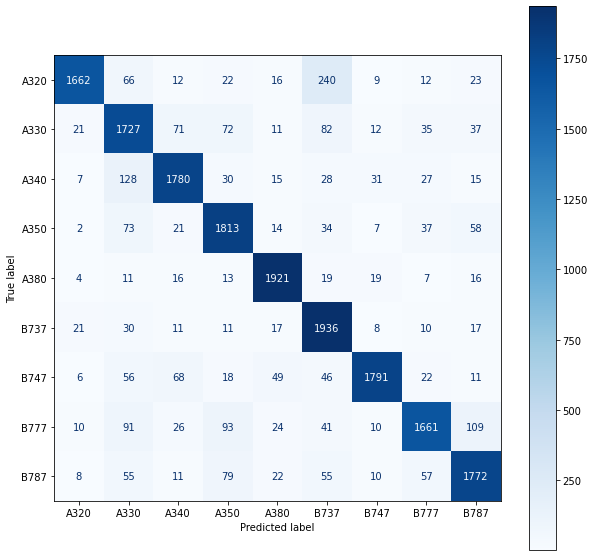

In [12]:
cm = confusion_matrix(all_df["model"], all_df["prediction_class"])
cmd = ConfusionMatrixDisplay(cm, display_labels=class_index.values())
cmd.plot(cmap="Blues")

# Visualise incorrect predictions for A380 

In [13]:
rstats = 158
a380_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_incorrect = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class!="A380"),:].sample(n=6, random_state=rstats)

In [14]:
a380_correct

,Unnamed: 0.1,index,Unnamed: 0,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
8732,8732,8817,8817,Airbus A380-842,Emirates,Photo date: 2021-03-06,Uploaded: 2021-03-06,"Location: Dubai Int'l - OMDB, United Arab Emir...",By: Oleksiy Naumov,cdn.jetphotos.com/400/6/56245_1615061960.jpg,...,-10.732328,-9.148778,-9.191680,-6.659492,3.485924,-4.680866,-7.491388,-5.497501,-0.938970,A380
9895,9895,10014,10014,Airbus A380-861,Korean Air,Photo date: 2019-04-03,Uploaded: 2020-09-24,"Location: Los Angeles Int'l Airport - KLAX, US...",By: Eric Page Lu,cdn.jetphotos.com/400/5/22211_1600067751.jpg,...,-8.607080,-6.679010,-9.865764,-1.534885,1.593982,-5.234960,-3.764202,-4.934328,-4.146243,A380
9633,9633,9739,9739,Airbus A380-861,Emirates,Photo date: 2013-10-23,Uploaded: 2020-11-02,"Location: Dubai Int'l - OMDB, United Arab Emir...",By: Jeremy Denton,cdn.jetphotos.com/400/5/35208_1603641919.jpg,...,-10.408611,-12.779452,-15.341954,-6.757374,9.246878,-8.706948,-7.862630,-7.498234,-3.628933,A380


In [15]:
a380_incorrect

,Unnamed: 0.1,index,Unnamed: 0,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
9565,9565,9668,9668,Airbus A380-841,China Southern Airlines,Photo date: 2016-07-03,Uploaded: 2020-11-15,"Location: Los Angeles Int'l Airport - KLAX, US...",By: Lynn Aisin-Gioro,cdn.jetphotos.com/400/6/38540_1604777495.jpg,...,-8.879519,-3.156780,-2.851544,-2.469101,0.673021,-6.106150,-3.358798,1.140043,-0.372070,B777
9728,9728,9836,9836,Airbus A380-841,China Southern Airlines,Photo date: 2020-10-07,Uploaded: 2020-10-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Sawamura Eriri,cdn.jetphotos.com/400/6/61515_1602251373.jpg,...,-5.275618,-2.977102,-2.383233,-1.753841,-0.639536,-4.442854,-4.578918,-0.016395,0.035887,B787
10141,10141,10264,10264,Airbus A380-841,Hifly Malta,Photo date: 2020-06-14,Uploaded: 2020-08-03,Location: Montreal Pierre Elliott Trudeau Int'...,By: Ryo Mizushima,cdn.jetphotos.com/400/5/38290_1595554509.jpg,...,-4.605383,-1.049902,-1.894765,-4.395500,-0.939439,-5.080682,-2.822763,-1.885809,-0.815388,B787
9113,9113,9209,9209,Airbus A380-841,China Southern Airlines,Photo date: 2020-12-30,Uploaded: 2021-01-03,Location: Melbourne Tullamarine Int'l Airport ...,By: XING LI,cdn.jetphotos.com/400/5/11231_1609306728.jpg,...,-9.873119,-5.607034,1.544444,-4.498732,0.325117,-5.232192,2.065681,-3.206605,-8.614575,B747
8831,8831,8919,8919,Airbus A380-841,China Southern Airlines,Photo date: 2021-01-26,Uploaded: 2021-02-13,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Eason Chen,cdn.jetphotos.com/400/5/21928_1612758069.jpg,...,-2.282661,-2.867923,-0.407096,-6.749704,-0.953993,-3.512996,-1.707287,-2.406550,-8.547132,A340
10268,10268,10392,10392,Airbus A380-841,China Southern Airlines,Photo date: 2020-06-25,Uploaded: 2020-07-12,"Location: Chengdu Shuangliu - ZUUU, China",By: TPS00,cdn.jetphotos.com/400/6/16779_1593939686.jpg,...,-3.219990,-0.464729,-2.822439,-1.541667,-2.615503,-4.255376,-1.609498,-5.535279,-3.965221,A330


In [16]:
img_df = pd.concat([a380_correct, a380_incorrect], axis=0)
img_df["download_path"].values

array(['./img/A380/cdn.jetphotos.com-400-6-56245_1615061960.jpg',
       './img/A380/cdn.jetphotos.com-400-5-22211_1600067751.jpg',
       './img/A380/cdn.jetphotos.com-400-5-35208_1603641919.jpg',
       './img/A380/cdn.jetphotos.com-400-6-38540_1604777495.jpg',
       './img/A380/cdn.jetphotos.com-400-6-61515_1602251373.jpg',
       './img/A380/cdn.jetphotos.com-400-5-38290_1595554509.jpg',
       './img/A380/cdn.jetphotos.com-400-5-11231_1609306728.jpg',
       './img/A380/cdn.jetphotos.com-400-5-21928_1612758069.jpg',
       './img/A380/cdn.jetphotos.com-400-6-16779_1593939686.jpg'],
      dtype=object)

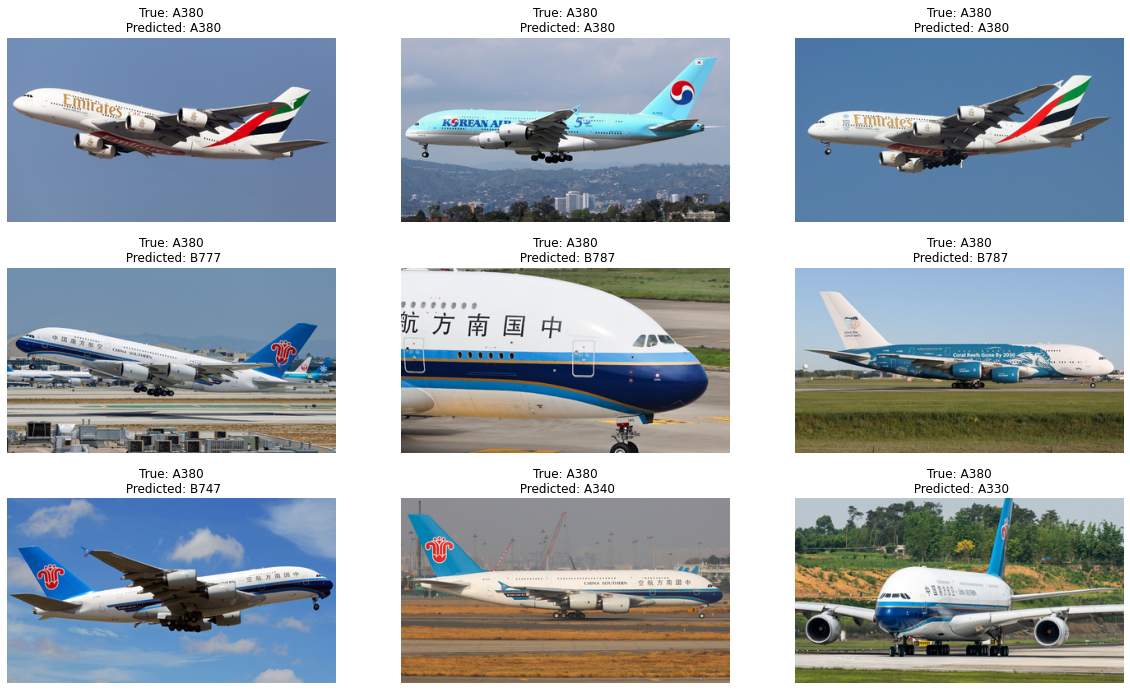

In [20]:
plt.figure(figsize=(20, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

In [24]:
rstats = 22
a380_pred_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_pred_incorrect = all_df.loc[(all_df.model!="A380") & (all_df.prediction_class=="A380"),:].sample(n=6, random_state=rstats)

In [25]:
img_df = pd.concat([a380_pred_correct, a380_pred_incorrect], axis=0)
img_df["download_path"].values

array(['./img/A380/cdn.jetphotos.com-400-6-53466_1595374205.jpg',
       './img/A380/cdn.jetphotos.com-400-6-91892_1621334067.jpg',
       './img/A380/cdn.jetphotos.com-400-6-76510_1615686419.jpg',
       './img/B787/cdn.jetphotos.com-400-5-99051_1619865509.jpg',
       './img/B777/cdn.jetphotos.com-400-5-41661_1620490918.jpg',
       './img/B747/cdn.jetphotos.com-400-5-57248_1620773099.jpg',
       './img/B747/cdn.jetphotos.com-400-6-10152_1621411670.jpg',
       './img/B787/cdn.jetphotos.com-400-5-10993_1621584399.jpg',
       './img/B747/cdn.jetphotos.com-400-6-25296_1620137351.jpg'],
      dtype=object)

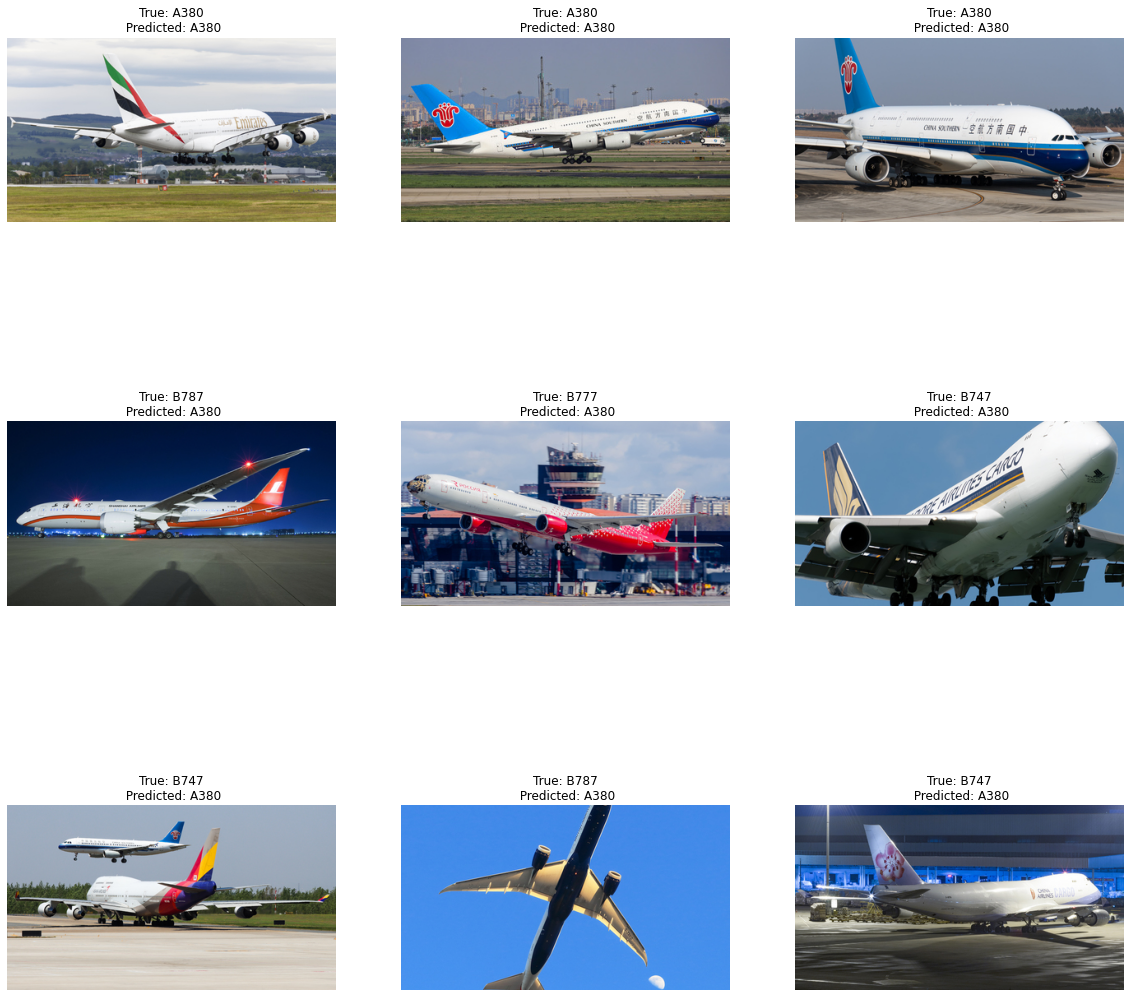

In [26]:
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

# Visualising QC classes

airliner         2065
wing                7
warplane            2
airship             1
passenger_car       1
toaster             1
dome                1
bullet_train        1
missile             1
Name: qc_class, dtype: int64


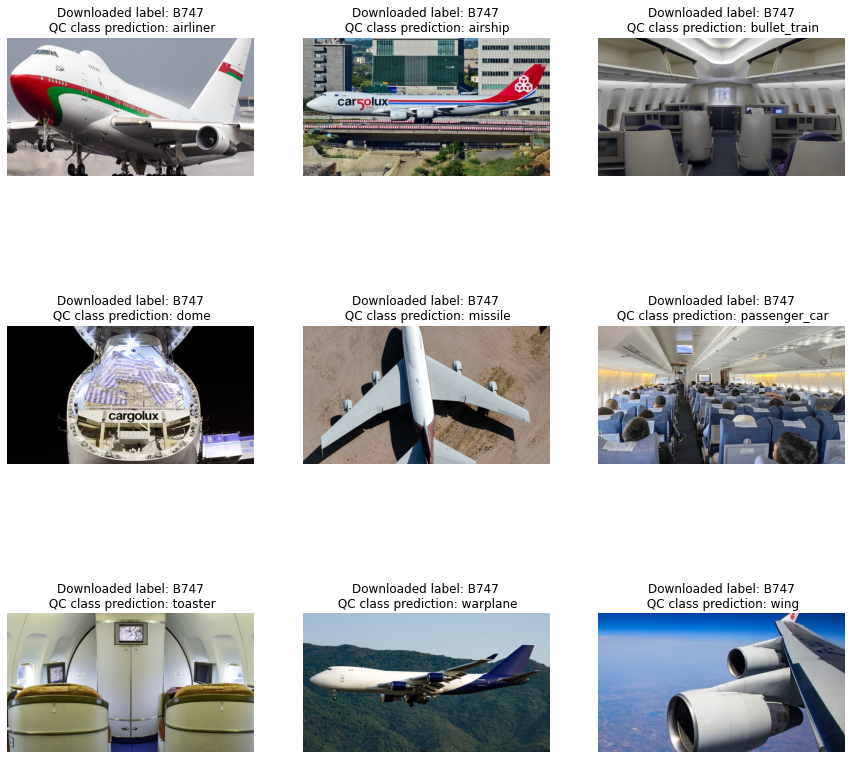

In [27]:
tmp = pd.read_csv("./output/all_info_filtered_for_planes_03May2022.csv")
tmp = tmp.loc[tmp.model.isin(["B747"]), ]
print(tmp.qc_class.value_counts())
tmp = tmp.groupby("qc_class").sample(n = 1, random_state = 1)
plt.figure(figsize=(15, 15))
for i in range(tmp.shape[0]):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(tmp["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "Downloaded label: " + tmp["model"].values[i] + "\n QC class prediction: " + tmp["qc_class"].values[i]
    ax.set_title(title)

# Using LIME to explain the classifications

In [28]:
import os
import keras
# from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
# from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [29]:
model = keras.models.load_model('/Users/kevinwang/GitHub/plane_variants/model/all9variants_dataframemodel_03May2022')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-04 21:12:51.963129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-04 21:12:51.963240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(225, 400))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = prep_fn(x)
        out.append(x)
    return np.vstack(out)

In [43]:
import lime
from lime import lime_image

In [90]:
explainer = lime_image.LimeImageExplainer()

def explain_and_plot(image):
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=100, hide_rest=True)
    return plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [91]:
from skimage.segmentation import mark_boundaries

(12, 24)


100%|██████████| 1000/1000 [00:10<00:00, 93.14it/s]


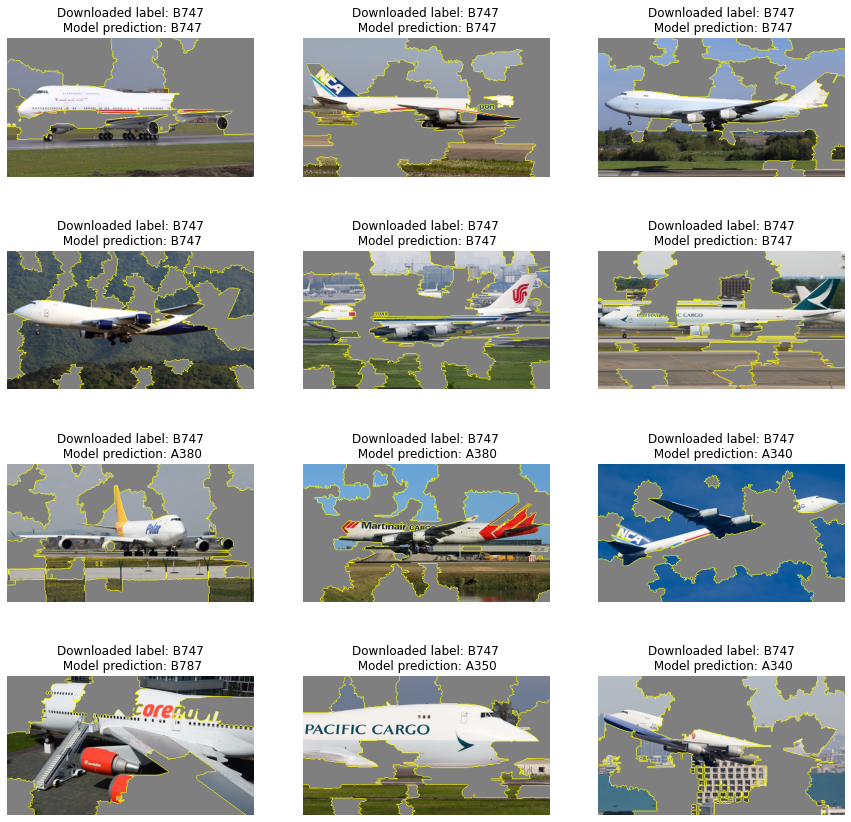

In [94]:
b747_correct = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class=="B747"),:].sample(n=6, random_state=2)
b747_incorrect = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class!="B747"),:].sample(n=6, random_state=5)
img_df = pd.concat([b747_correct, b747_incorrect], axis=0)
images = transform_img_fn(img_df.loc[:, "download_path"].values)

print(img_df.shape)
plt.figure(figsize=(15, 15))

for i in range(img_df.shape[0]):
    ax = plt.subplot(4, 3, i + 1)
    # img = mpimg.imread(img_df["download_path"].values[i])
    # plt.imshow(img)
    explain_and_plot(images[i])
    plt.axis("off")
    title = "Downloaded label: " + img_df["model"].values[i] + "\n Model prediction: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

In [58]:
# preds = model.predict(images, verbose=1)
# print(list(np.apply_along_axis(func1d=np.argmax, arr=preds, axis=1)))

1/1 [==============================] - 0s 24ms/step
[7, 8, 8, 6, 2, 1]
